# Supernova Lightcurves

Figure 9.3 from Chapter 9 of *Stellar Structure & Evolution*, Pinsonneault & Ryden, Cambridge University
Press.

Three-panel plot of representative supernova light curves: 
 * left: thermonuclear (Type Ia) supernova
 * center: Type II-L and II-P core-collapse supernovae
 * right: Type IIn and IIb core-collapse supernovae
 
We are using ASCII text versions of V-band light curves extracted from the original JSON data structures for 
each supernova of interest to save space and processing time for the notebook.

Data were seleted from the [Open Supernova Catalog](http://sne.space).

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter
from matplotlib.patches import Ellipse

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig9_3.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Supernova lightcurves

Data are in multi-column ASCII text files with commented headers read using pandas. 
 * SN2013dy - Type Ia
 * SN1993J - Type IIb
 * SN2013ai - Type II-L
 * SN1999gi - Type II-P
 * SN2011ht - Type IIn
 

In [3]:
sneList = ['SN2013dy','SN1993J','SN2013ai','SN1999gi','SN2011ht']
sneType = {'SN2013dy':'Ia','SN1993J':'IIb','SN2013ai':'II-L','SN1999gi':'II-P','SN2011ht':'IIn'}
sneColor = {'SN2013dy':'black','SN1993J':'white','SN2013ai':'white','SN1999gi':'black','SN2011ht':'black'}
dataDir = 'Supernovae'

snePanels = [['SN2013dy'],['SN1999gi','SN2013ai'],['SN2011ht','SN1993J']]

expTime = {}
MV = {}
errMV = {}
for sne in sneList:
    dataFile = f'{dataDir}/{sne}.txt'
    data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
    expTime[sne] = np.array(data['Time'])
    MV[sne] = np.array(data['MV'])
    errMV[sne] = np.array(data['errMV'])
    
# plotting limits

minT = -59.0 # days before maximum
maxT = 190.0 # days after maximum
minV = -10.0 # faint V magnitude
maxV = -20.0 # bright V magnitude    


### Plot of supernova light curves

Three-panel, side-by-side plot supernova light cirves
 * Left: SN2013dy (Type Ia)
 * Middle: SN1999ig and SN2013ai (Type II-P and II-L)
 * Right: SN2011ht and SN1993J (Type IIn and IIb)


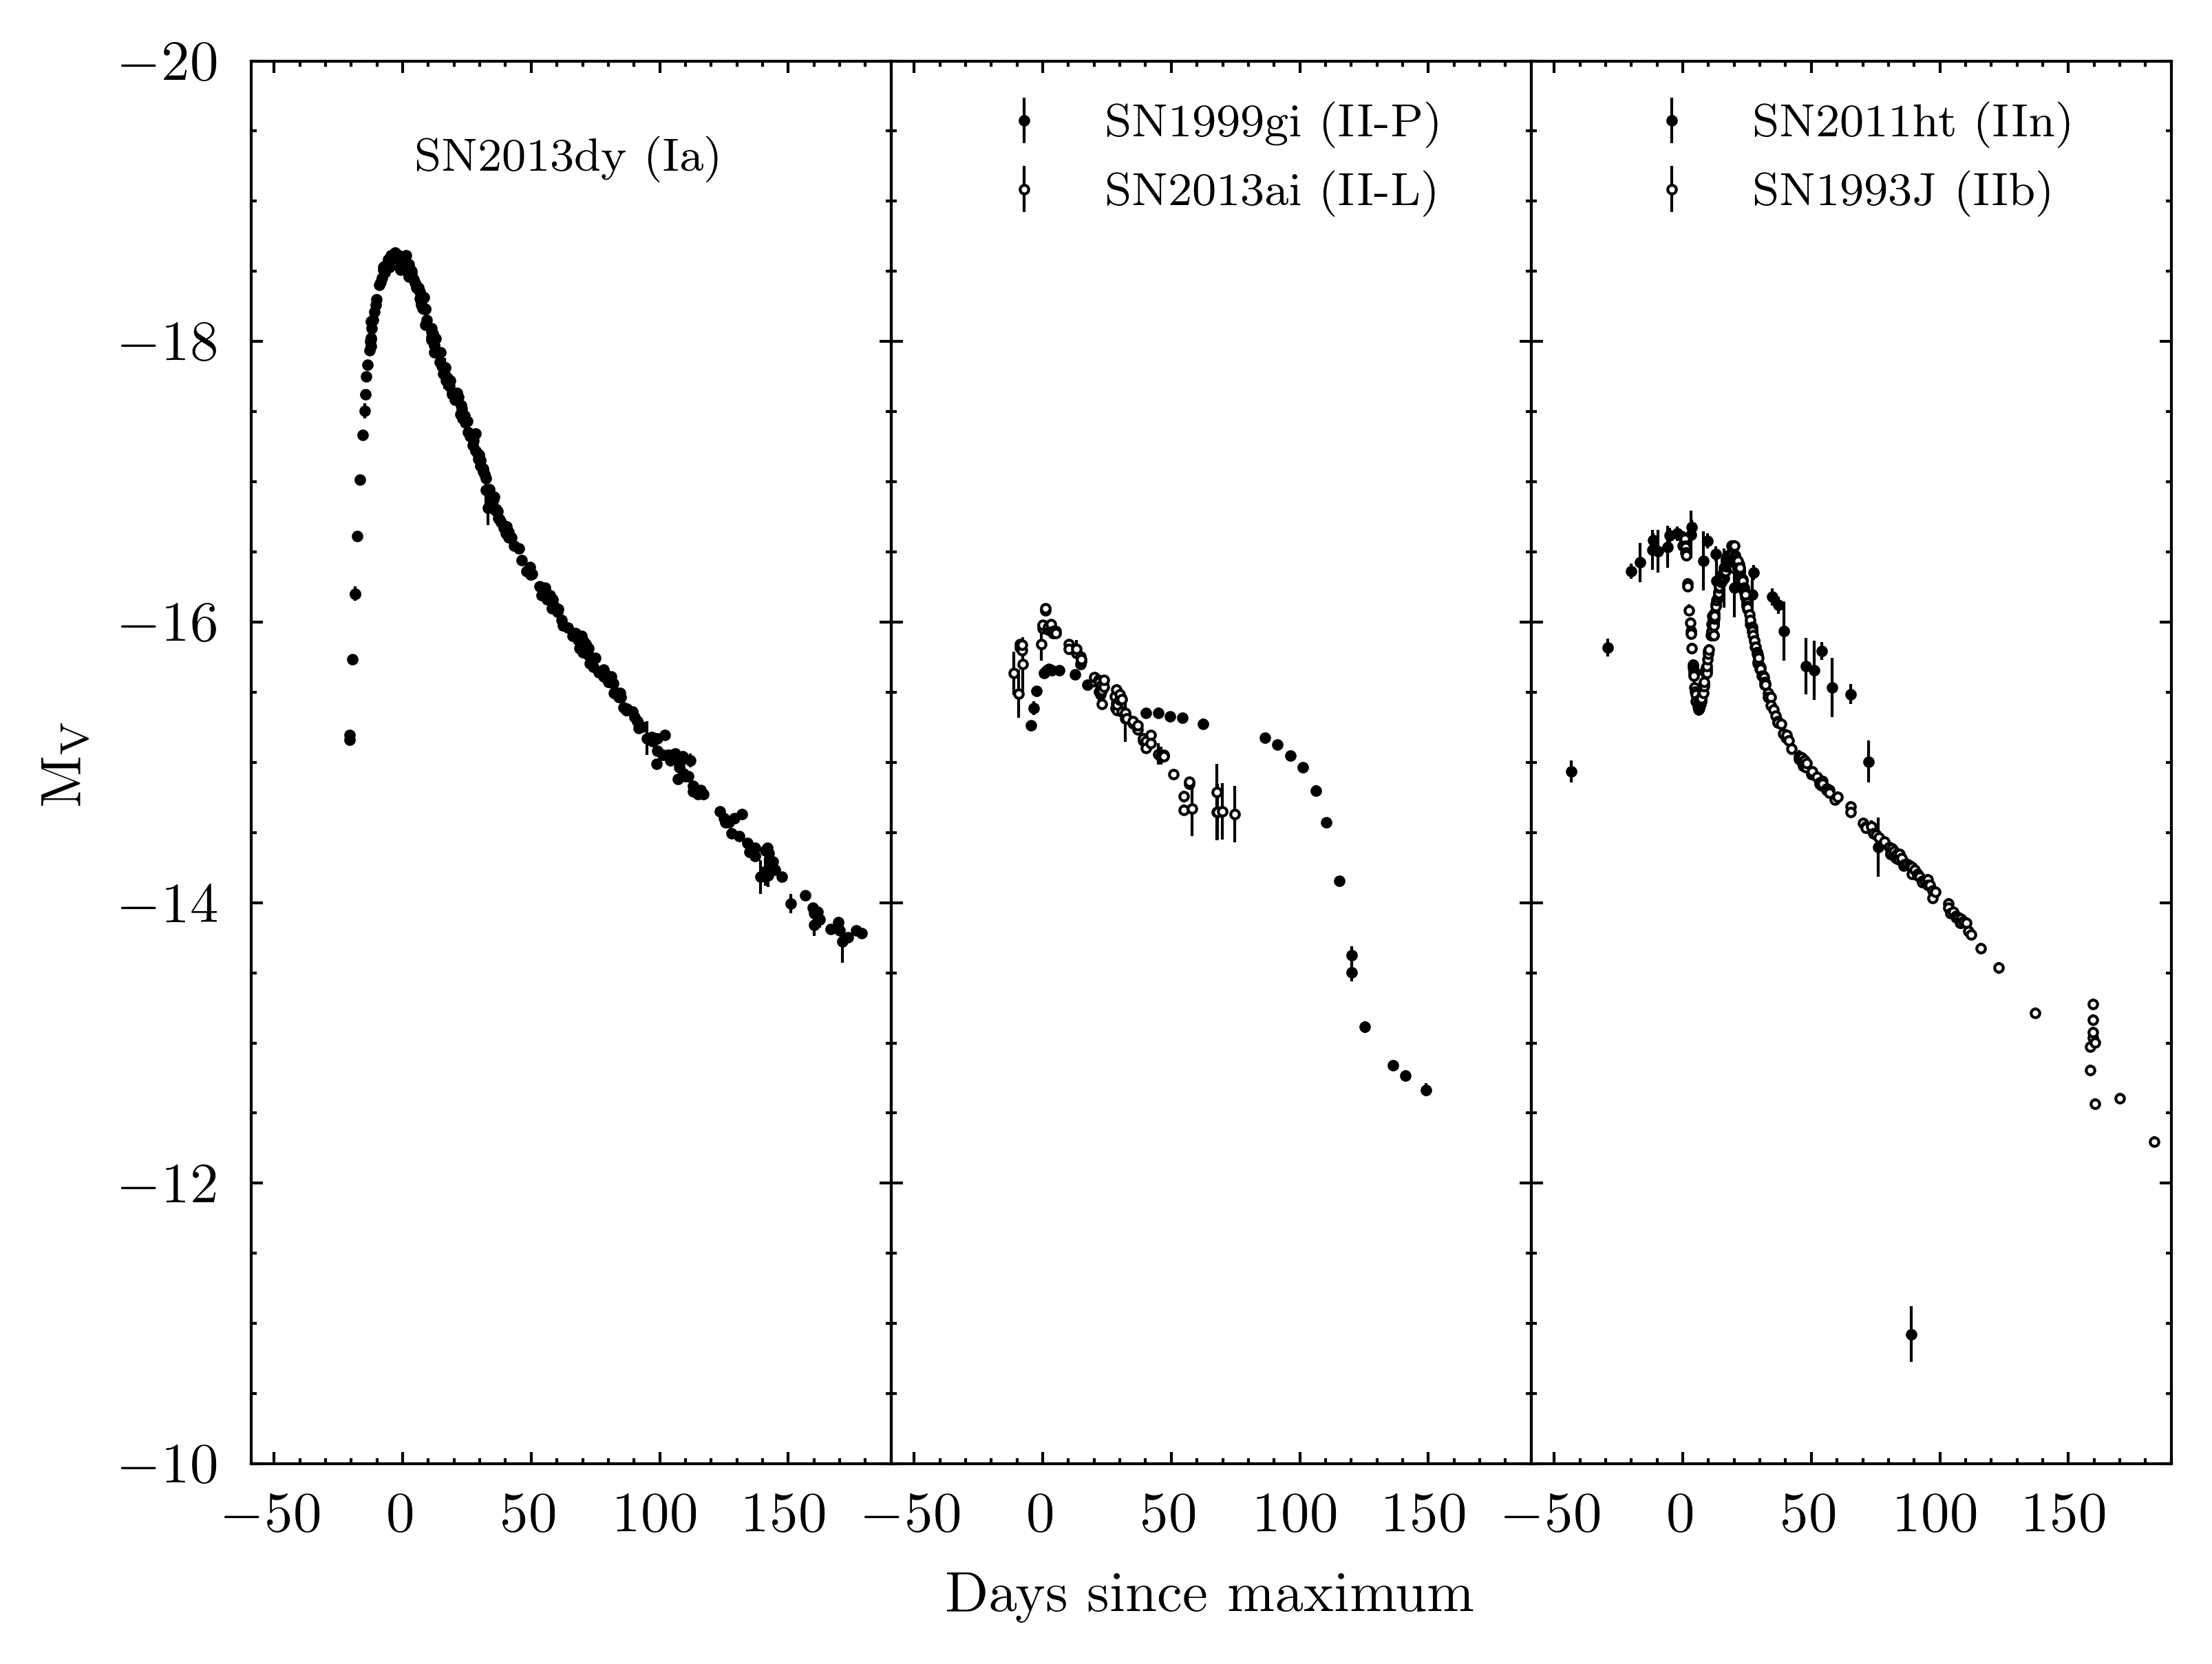

In [4]:
fig,ax = plt.subplots(1,3,figsize=(wInches,hInches),dpi=dpi)
    
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(len(snePanels)):
    ax[i].set_xlim(minT,maxT)
    ax[i].set_ylim(minV,maxV)
    ax[i].tick_params('both',length=2,width=lwidth,which='major',direction='in',top='on',right='on')
    ax[i].tick_params('both',length=1,width=lwidth,which='minor',direction='in',top='on',right='on')
    ax[i].xaxis.set_major_locator(MultipleLocator(50))
    ax[i].xaxis.set_minor_locator(MultipleLocator(10))
    ax[i].yaxis.set_major_locator(MultipleLocator(2.0))
    ax[i].yaxis.set_minor_locator(MultipleLocator(0.5))
    if i==1:
        ax[i].set_xlabel(r'Days since maximum', fontsize=axisFontSize)
    if i > 0:
        ax[i].axes.yaxis.set_ticklabels([])
    else:
        ax[i].set_ylabel(r'M$_{\rm V}$',fontsize=axisFontSize)
    for sne in snePanels[i]:
        plotLabel = f'{sne} ({sneType[sne]})'
        ax[i].errorbar(expTime[sne], MV[sne], yerr=errMV[sne], fmt='o', mfc=sneColor[sne], 
                       mec='black', mew=0.5, ms=1.5, elinewidth=0.5, ecolor='black',label=plotLabel)
    if i>0:
        legend = ax[i].legend(fontsize=8,loc='upper center',frameon=False)
        legend.get_frame().set_linewidth(0.5)
    else:
        ax[i].text(0.5*(minT+maxT),-19.3,plotLabel,va='center',ha='center',fontsize=8)
        

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')